In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000914138"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000914138
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,MIDDLEBURG FINANCIAL CORP
Ticker,MBRG


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,43.0,1.626000e+01,1.417565e+00,14.02,1.508500e+01,16.15,17.43,20.71
interest income,49.0,9.796102e+06,4.490204e+06,10992.00,1.066400e+07,11212000.00,12132000.00,14991000.00
net income,50.0,1.494627e+06,1.156363e+06,-5365000.00,1.239750e+06,1655500.00,2093500.00,2653000.00
net interest income,51.0,8.205516e+06,1.972414e+06,9341.00,6.790000e+06,9217000.00,9610000.00,9969000.00
provision for loan losses,49.0,7.620408e+05,1.361528e+06,-297000.00,1.520000e+05,407000.00,964000.00,9130000.00


# Plots

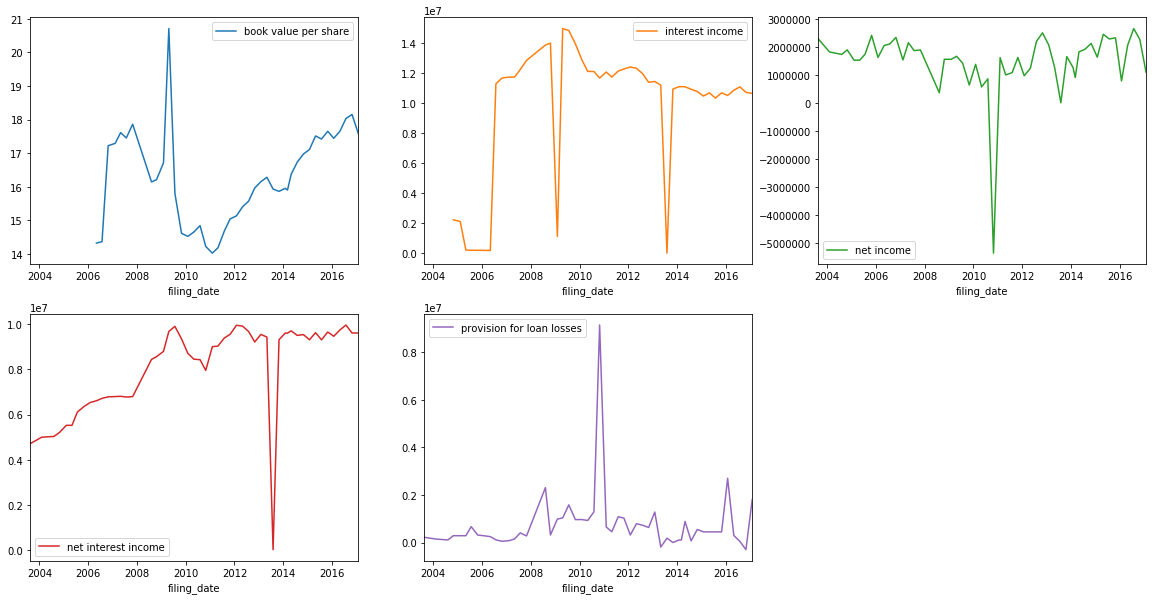

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000914138 book value per share       2003Q2 to 2005Q4: 11 periods    missing   
           book value per share        2007Q4 to 2008Q1: 2 periods    missing   
           interest income             2003Q2 to 2004Q2: 5 periods    missing   
           interest income             2007Q4 to 2008Q1: 2 periods    missing   
           net income                                       2003Q3    missing   
           net income                                       2004Q1    missing   
           net income                                       2005Q1    missing   
           net income                  2007Q4 to 2008Q1: 2 periods    missing   
           net income                                       2008Q4    missing   
           net income                                       2013Q4  duplicate   
           net interest income                              2003Q3    missing   
           net interest income                              2004Q1    missing   
           net interest income                              2005Q1    missing   
           net interest income         2007Q4 to 2008Q1: 2 periods    missing   
           provision for loan losses                        2003Q3    missing   
           provision for loan losses                        2004Q1    missing   
           provision for loan losses                        2005Q1    missing   
           provision for loan losses   2007Q4 to 2008Q1: 2 periods    missing   
           provision for loan losses   2015Q2 to 2015Q3: 2 periods    missing   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0000914138 book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()